<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/RNN_FOR_DATA_PICTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURED.zip

In [5]:
# !pip install visualkeras

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURED"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture = []
      for index in range(len(df)) :
        value = df.iloc[index , 2 ]
        matrix_picture.append(value)

      matrix_picture = np.array(matrix_picture).reshape(16,3)
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_void_alpha
/content/DATA_PICTURED/picture_void_alpha/alpha_0.023_void_0.2.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.033_void_0.4.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.072_void_0.3.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.087_void_0.4.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.077_void_0.1.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.006_void_0.1.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.056_void_0.3.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.018_void_0.4.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.03_void_0.2.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.032_void_0.3.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.071_void_0.3.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.084_void_0.2.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.014_void_0.1.csv
/content/DATA_PICTURED/picture_void_alpha/alpha_0.074_void_0.1.csv
/content/DATA_PICTURED/picture_void_alpha/al

In [8]:
x , y = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      x.append(img)
      y.append(i)


In [9]:
x = np.array(x).reshape(-1 , 16 , 3 , 1 )

In [10]:
x.shape

(387, 16, 3, 1)

In [31]:
TOTAL_X_vector = []
TOTAL_Y_vector = []

for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector.append(picture[i + window_size])

TOTAL_X_vector_array = np.array(TOTAL_X_vector).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_array = np.array(TOTAL_Y_vector).reshape(-1 , 3 )


In [32]:
TOTAL_X_vector_array.shape

(5418, 2, 3)

In [33]:
TOTAL_Y_vector_array.shape

(5418, 3)

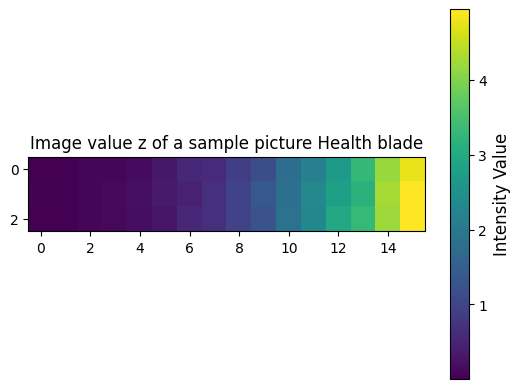

[[9.63014253e-03 2.09702589e-02 1.27662046e-02]
 [5.40753356e-03 1.53721994e-03 5.31961779e-03]
 [8.33248134e-02 8.41059829e-02 9.17470421e-02]
 [1.07855749e-01 1.29133774e-01 9.66976695e-02]
 [1.76827582e-01 2.13861775e-01 1.54159949e-01]
 [2.93419225e-01 3.62637605e-01 3.16300802e-01]
 [5.77140420e-01 4.60539219e-01 5.48601331e-01]
 [6.71175956e-01 6.80655878e-01 5.96394356e-01]
 [9.89116192e-01 1.00639437e+00 9.11107322e-01]
 [1.27268559e+00 1.35557400e+00 1.18464718e+00]
 [1.86099835e+00 1.80745498e+00 1.78557064e+00]
 [2.31965815e+00 2.32830640e+00 2.16311383e+00]
 [2.98325740e+00 2.80613876e+00 2.69520577e+00]
 [3.30899962e+00 3.17358590e+00 3.29327526e+00]
 [4.21936278e+00 4.28705820e+00 4.18111118e+00]
 [4.93579239e+00 4.94979512e+00 4.78477093e+00]]


In [23]:
# import matplotlib.colors
# rotated_data = np.rot90(picture_reshaped)
# img = plt.imshow(rotated_data ,  cmap='viridis'  )
# cbar = plt.colorbar(img,)
# cbar.set_label('Intensity Value', fontsize=12)
# plt.title('Image value z of a sample picture Health blade')
# plt.show()
# print(x[0][ : , : , 0 ])

In [38]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_vector_array,TOTAL_Y_vector_array , test_size=0.3 , random_state = 42 )

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model = Sequential([
    # لایه LSTM: 64 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(32, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)
model.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,587 (76.51 KB)

 Trainable params: 19,587 (76.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
95/95 - 5s - 48ms/step - loss: 1.1096 - mae: 0.5885 - val_loss: 0.0281 - val_mae: 0.1335
Epoch 2/100
95/95 - 1s - 6ms/step - loss: 0.0583 - mae: 0.1643 - val_loss: 0.0217 - val_mae: 0.1125
Epoch 3/100
95/95 - 1s - 11ms/step - loss: 0.0512 - mae: 0.1560 - val_loss: 0.0170 - val_mae: 0.1014
Epoch 4/100
95/95 - 1s - 11ms/step - loss: 0.0483 - mae: 0.1486 - val_loss: 0.0146 - val_mae: 0.0916
Epoch 5/100
95/95 - 1s - 10ms/step - loss: 0.0427 - mae: 0.1367 - val_loss: 0.0144 - val_mae: 0.0879
Epoch 6/100
95/95 - 1s - 6ms/step - loss: 0.0383 - mae: 0.1274 - val_loss: 0.0123 - val_mae: 0.0802
Epoch 7/100
95/95 - 1s - 6ms/step - loss: 0.0329 - mae: 0.1187 - val_loss: 0.0115 - val_mae: 0.0770
Epoch 8/100
95/95 - 1s - 6ms/step - loss: 0.0311 - mae: 0.1160 - val_loss: 0.0109 - val_mae: 0.0762
Epoch 9/100
95/95 - 1s - 6ms/step - loss: 0.0305 - mae: 0.1122 - val_loss: 0.0100 - val_mae: 0.0714
Epoch 10/100
95/95 - 1s - 7ms/step - loss: 0.0291 - mae: 0.1110 - val_loss: 0.0107 - val_mae: 0.

In [40]:
y_predict = model.predict(x_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [41]:
y_predict.shape

(1626, 3)

In [42]:
y_test.shape

(1626, 3)

In [43]:
t = []
t.append(x_test[0])
t = np.array(t)
y_t = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [51]:
t.shape

(1, 2, 3)

In [44]:
y_test[0]

array([3.1560832 , 3.34423666, 3.31102758])

In [45]:
y_t

array([[3.5098274, 3.4691718, 3.4747522]], dtype=float32)

In [46]:
new_sample_x = []
new_sample_y = []
for picture in x :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])


  break

new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )


In [69]:
new_sample_y_array.shape

(14, 3)

In [47]:
new_sample_x_array.shape

(14, 2, 3)

In [64]:
total_y_pre = []
for i in new_sample_x_array :
  t=[]
  t.append(i)
  t = np.array(t)
  y_pre = model.predict(t)
  y_pre = y_pre.tolist()
  total_y_pre.append(y_pre[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [65]:
total_y_pre = np.array(total_y_pre)

In [66]:
total_y_pre.shape

(14, 3)

In [67]:
total_y_pre

array([[0.08820276, 0.08411194, 0.09013408],
       [0.15143397, 0.14620629, 0.15127295],
       [0.22261724, 0.21776029, 0.2224533 ],
       [0.29768646, 0.29201984, 0.29656166],
       [0.47083747, 0.46391752, 0.46596825],
       [0.75800079, 0.7467711 , 0.74421543],
       [1.01011038, 0.99716938, 0.99219102],
       [1.35388827, 1.33632982, 1.3303386 ],
       [1.70006573, 1.68342733, 1.68268132],
       [2.21103334, 2.18914843, 2.19240522],
       [2.81102276, 2.78247046, 2.78905106],
       [3.43568087, 3.39456749, 3.40399551],
       [4.05242348, 4.00021553, 4.0059886 ],
       [4.90769577, 4.83225203, 4.840837  ]])

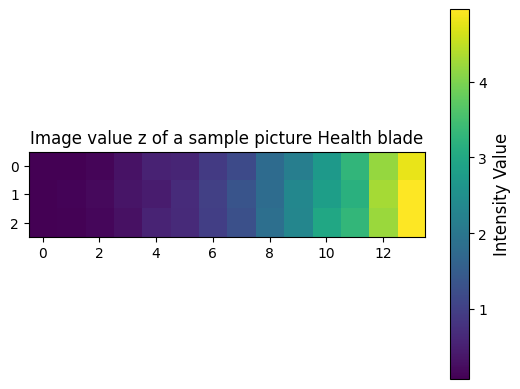

In [70]:
rotated_data = np.rot90(new_sample_y_array)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()

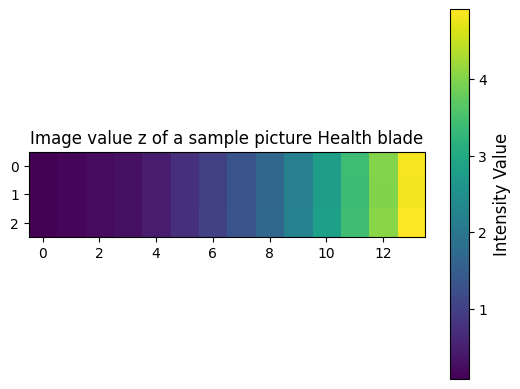

In [68]:
rotated_data = np.rot90(total_y_pre)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()
